<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Practical-Assignment-4" data-toc-modified-id="Practical-Assignment-4-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Practical Assignment 4</a></span><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Gaussian-Process" data-toc-modified-id="Gaussian-Process-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gaussian Process</a></span><ul class="toc-item"><li><span><a href="#Prior-Distribution-over-functions" data-toc-modified-id="Prior-Distribution-over-functions-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Prior Distribution over functions</a></span></li><li><span><a href="#Joint-Distribution" data-toc-modified-id="Joint-Distribution-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Joint Distribution</a></span></li><li><span><a href="#Inference" data-toc-modified-id="Inference-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Inference</a></span></li></ul></li></ul></li></ul></div>

# Practical Assignment 4

Implement a Gaussian Processes Regress from the first principle to find functions that model the relationship between the following.

x = [0, 0.1, 2, 4] & y = [4, 0.9, 3.6, 5]

## Objectives 
- Implement a Gaussian Processes Regression from the first principle to find functions that model the relationship between given points 
- Perform inference with different standard deviations to capture uncertainties 

## Gaussian Process 

In probability theory and statistics, a `Gaussian process` is a stochastic process (a collection of random variables indexed by time or space), such that every finite collection of those random variables has a multivariate normal distribution, i.e. every finite linear combination of them is normally distributed. The distribution of a Gaussian process is the joint distribution of all those (infinitely many) random variables, and as such, it is a distribution over functions with a continuous domain, e.g. time or space.

Source: [Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/gpml/)

The `Gaussian processes model` is a probabilistic supervised machine learning framework that has been widely used for regression and classification tasks. A Gaussian processes regression (GPR) model can make predictions incorporating prior
knowledge (kernels) and provide uncertainty measures over predictions

Source: [An Intuitive Tutorial to Gaussian Processes Regression](https://arxiv.org/pdf/2009.10862.pdf) & [Gaussian Process Regression from First Principles](https://towardsdatascience.com/gaussian-process-regression-from-first-principles-833f4aa5f842)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Regression 
x = [0, 0.1, 2, 4]
y = [4, 0.9, 3.6, 5]

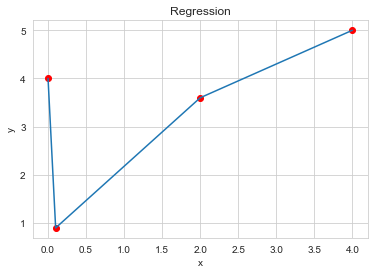

In [3]:
plt.plot(x,y);
plt.scatter(x,y, color = 'r')
plt.title('Regression');
plt.xlabel('x');
plt.ylabel('y');

### Prior Distribution over functions 

**Kernels**
- The most widely used `kernel` or covariance function is the `squared exponential (SE) kernel function`
- The SE kernel is de-facto default kernel for Gaussian processes 
- This is because it can be integrated against most functions that you need to due to its universal property. And every function in its prior has infinitely many derivatives. It’s also known as the `radial basis function (RBF) kernel or Gaussian kernel function`

In [4]:
n = 200 
x_prior = np.linspace(-5,5,n)
def Kernel(x):
    return np.exp(-0.5 * np.array([(x - xi)**2 for xi in x]))

**Multivariate Normal Distribution**
- It’s common that a system is described by more than one feature variables that are correlated to each other.
- If we want to model these variables all together as one Gaussian model, we need to use a `multivariate Gaussian/normal (MVN) distribution model`

In [21]:
K_prior = Kernel(x_prior)
mu_prior = np.zeros_like(x_prior)
f_prior = np.random.multivariate_normal(mu_prior, K_prior, 10)

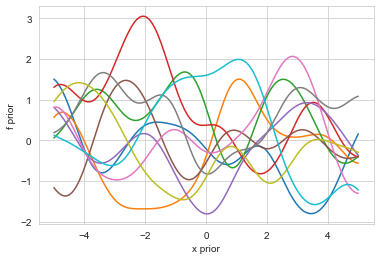

In [22]:
plt.plot(x_prior, f_prior.T);
#plt.scatter(x,y, color = 'r', zorder=3)
plt.xlabel('x prior');
plt.ylabel('f prior');
plt.show();

### Joint Distribution

The functions generated by connecting independent Gaussian vector points are not smooth enough for regression tasks, we need these independent Gaussian correlated to each other as a `joint Gaussian distribution`. 

In [23]:
x_joint = np.r_[x, x_prior]
K_joint = Kernel(x_joint)

In [24]:
n = len(x)
K = K_joint[:n,:n]
Kx = K_joint[n:,:n]
Kxx = K_joint[n:,n:]

In [27]:
mu_posterior = Kx@np.linalg.inv(K)@y
K_posterior = Kxx - Kx@np.linalg.inv(K)@Kx.T
f_posterior = np.random.multivariate_normal(mu_posterior, K_posterior, 10)

### Inference

**Overview**
- A Gaussian processes model is a probability distribution over possible functions that fit a set of points `(red dots)`
- Since we have the probability distribution over all possible functions, the means of the functions `(black line)` can be calculated and so as the variances to indicate how confident the predictions are `(grey lines 1, 2 & 3 standard deviation)` 


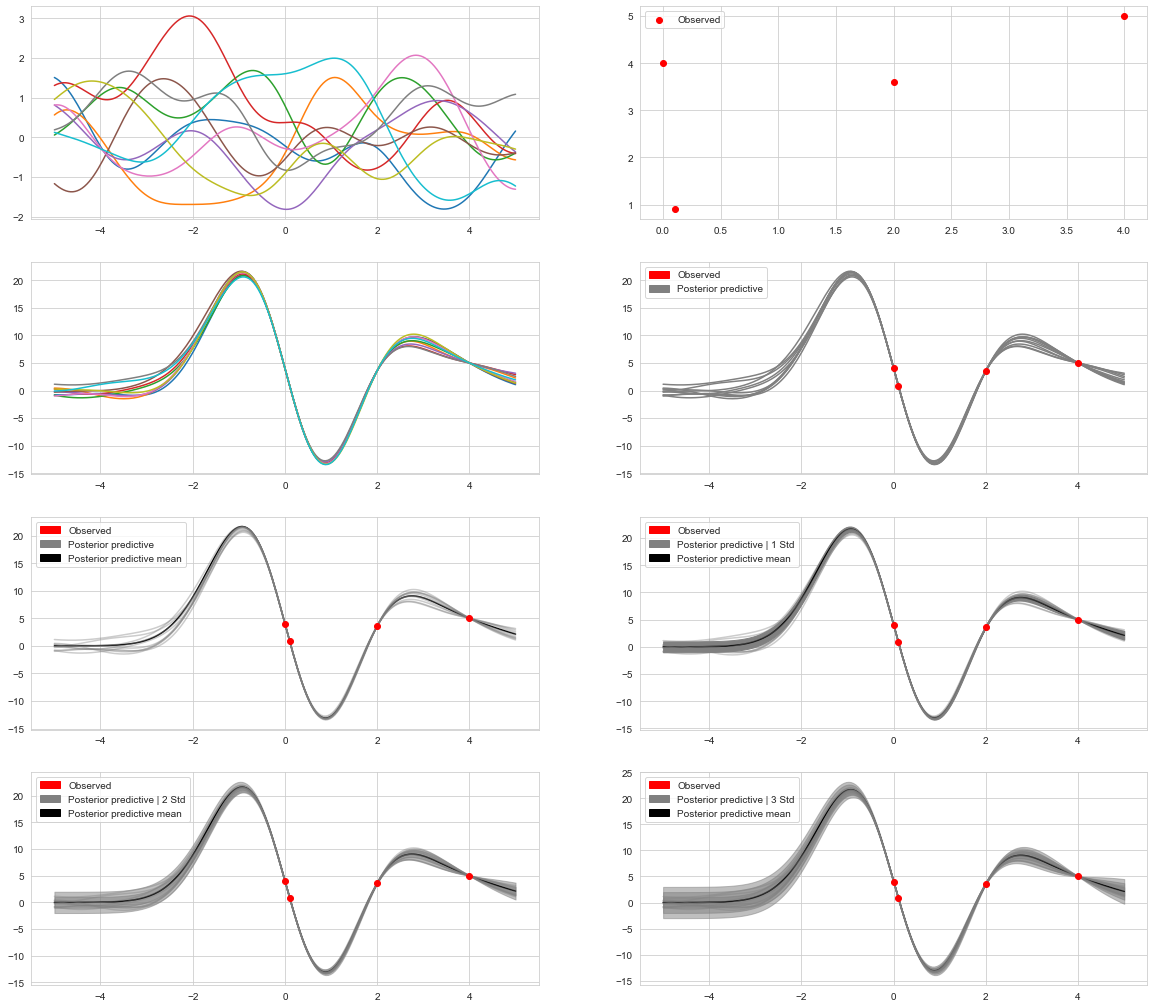

In [31]:
_,ax = plt.subplots(4,2, figsize=(20,18));
ax[0,0].plot(x_prior, f_prior.T);
ax[0,1].scatter(x, y, color='r', label = 'Observed');
ax[0,1].legend();
ax[1,0].plot(x_prior, f_posterior.T);


ax[1,1].plot(x_prior, f_posterior.T, color='grey');
ax[1,1].scatter(x,y, zorder=3, color='r');
observed_patch = mpatches.Patch(color='r', label='Observed')
posterior_patch = mpatches.Patch(color='grey', label='Posterior predictive')
ax[1,1].legend(handles=[observed_patch, posterior_patch], loc = 'upper left');


ax[2,0].plot(x_prior, mu_posterior, color='k');
ax[2,0].plot(x_prior, f_posterior.T, color='grey', alpha=0.4);
ax[2,0].scatter(x,y, zorder=3, color='r');
postmean_patch = mpatches.Patch(color='k', label='Posterior predictive mean')
ax[2,0].legend(handles=[observed_patch, posterior_patch, postmean_patch], loc = 'upper left');

ax[2,1].fill_between(x_prior, mu_posterior + np.sqrt(np.diag(K_posterior)),
                    mu_posterior - np.sqrt(np.diag(K_posterior)), color='grey')
ax[2,1].plot(x_prior, mu_posterior, color='k');
ax[2,1].plot(x_prior, f_posterior.T, color='grey', alpha=0.4);
ax[2,1].scatter(x,y, zorder=3, color='r');
posterior1std_patch = mpatches.Patch(color='grey', label='Posterior predictive | 1 Std')
ax[2,1].legend(handles=[observed_patch, posterior1std_patch, postmean_patch], loc = 'upper left');

ax[3,0].fill_between(x_prior, mu_posterior + np.sqrt(np.diag(K_posterior)),
                    mu_posterior - np.sqrt(np.diag(K_posterior)), color='grey', alpha=0.5)
ax[3,0].fill_between(x_prior, mu_posterior + 2*np.sqrt(np.diag(K_posterior)),
                    mu_posterior - 2*np.sqrt(np.diag(K_posterior)), color='grey', alpha=0.5)
ax[3,0].plot(x_prior, mu_posterior, color='k');
ax[3,0].plot(x_prior, f_posterior.T, color='grey', alpha=0.4);
ax[3,0].scatter(x,y, zorder=3, color='r');
posterior2std_patch = mpatches.Patch(color='grey', label='Posterior predictive | 2 Std')
ax[3,0].legend(handles=[observed_patch, posterior2std_patch, postmean_patch], loc = 'upper left');

ax[3,1].fill_between(x_prior, mu_posterior + np.sqrt(np.diag(K_posterior)),
                    mu_posterior - np.sqrt(np.diag(K_posterior)), color='grey', alpha=0.5)
ax[3,1].fill_between(x_prior, mu_posterior + 2*np.sqrt(np.diag(K_posterior)),
                    mu_posterior - 2*np.sqrt(np.diag(K_posterior)), color='grey', alpha=0.5)
ax[3,1].fill_between(x_prior, mu_posterior + 3*np.sqrt(np.diag(K_posterior)),
                    mu_posterior - 3*np.sqrt(np.diag(K_posterior)), color='grey', alpha=0.5)
ax[3,1].plot(x_prior, mu_posterior, color='k');
ax[3,1].plot(x_prior, f_posterior.T, color='grey', alpha=0.4);
ax[3,1].scatter(x,y, zorder=3, color='r');
posterior3std_patch = mpatches.Patch(color='grey', label='Posterior predictive | 3 Std')
ax[3,1].legend(handles=[observed_patch, posterior3std_patch, postmean_patch], loc = 'upper left');

**Summarization**
- The function (posteriors) updates with new observations
- The Gaussian process model is a probability distribution over possible functions, and any finite sample of functions are jointly Gaussian distributed
- The mean function calculated by the posterior distribution of possible functions is the function used for regression predictions.